In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [2]:
data = pd.read_csv("data/Advertising_data.csv")
data.head() #first five row of the data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [10]:
#Initializing the variables
x = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)


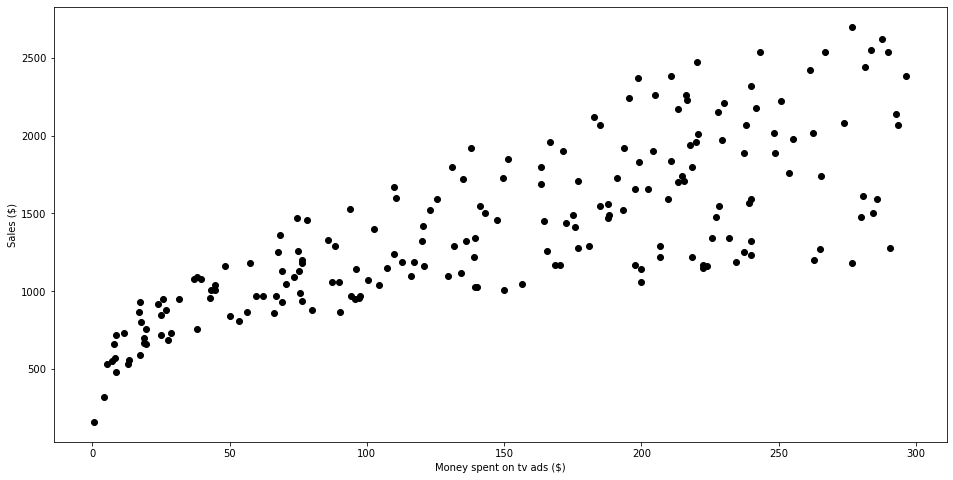

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(x,y, c='black')
plt.xlabel('Money spent on tv ads ($)')
plt.ylabel("Sales ($)")
#plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

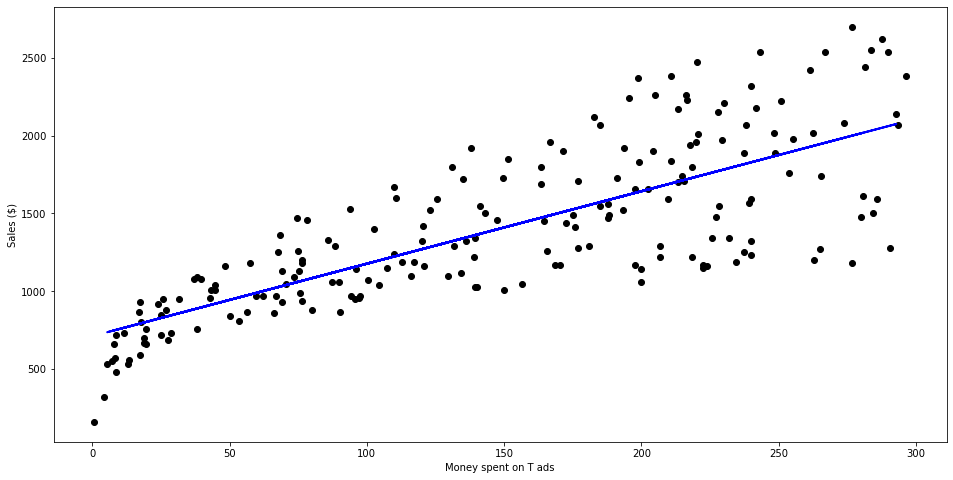

In [16]:
y_pred = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(x,y, c='black')
plt.plot(
  x_test,
  y_pred,
  c='blue',
  linewidth=2
)
plt.xlabel("Money spent on T ads")
plt.ylabel("Sales ($)")
plt.show()

In [17]:
#calculating coefficients
reg.coef_

array([[4.65297337]])

In [18]:
reg.intercept_

array([711.96384306])

In [22]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

 Multiple Line Regression

In [27]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

# Multiple Line Regression


In [29]:
#Initializing the variables
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [30]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [33]:
#Calculating the Coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [34]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

In [35]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.899438024100912

In [36]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 250
Radio : 300
Newspaper : 500
you will get Rs7230.05 sales by advertising Rs250.0 on TV, Rs300.0 on Radio and Rs500.0 on newspaper.


In [38]:
#Saving the model
import pickle
MODEL_PATH = "models/multiple_reg.sav"
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))